<a href="https://colab.research.google.com/github/ShreyJais/ML-MSc_AIML/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports and Dataset

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/sales_data.csv')

In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


About the sales dataset:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [ ]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


#Visualisation

In [ ]:
#Visualisation functions
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}')

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns

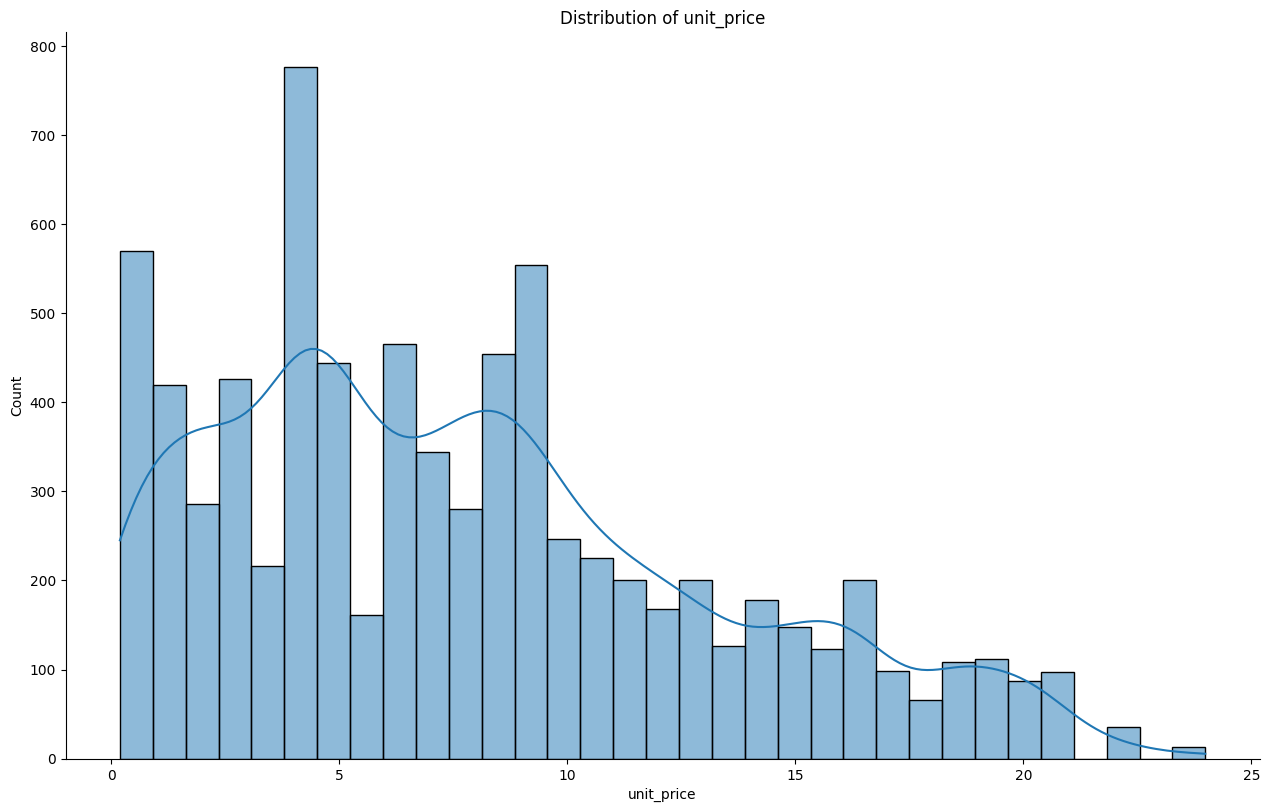

In [ ]:
plot_continuous_distribution(df, 'unit_price')

- more sales of low-priced products compared to high-priced ones.

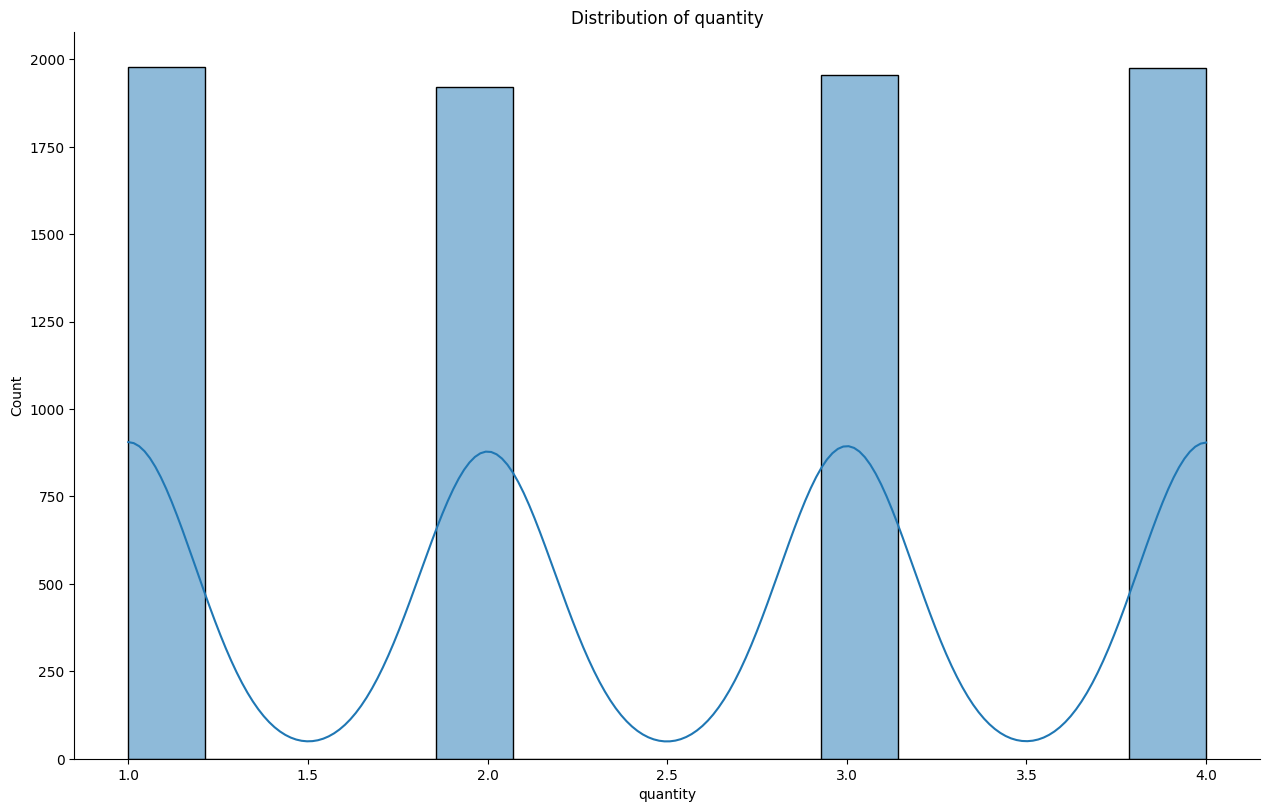

In [ ]:
plot_continuous_distribution(df, 'quantity')

- customers are buying in quantities across 1 to 4

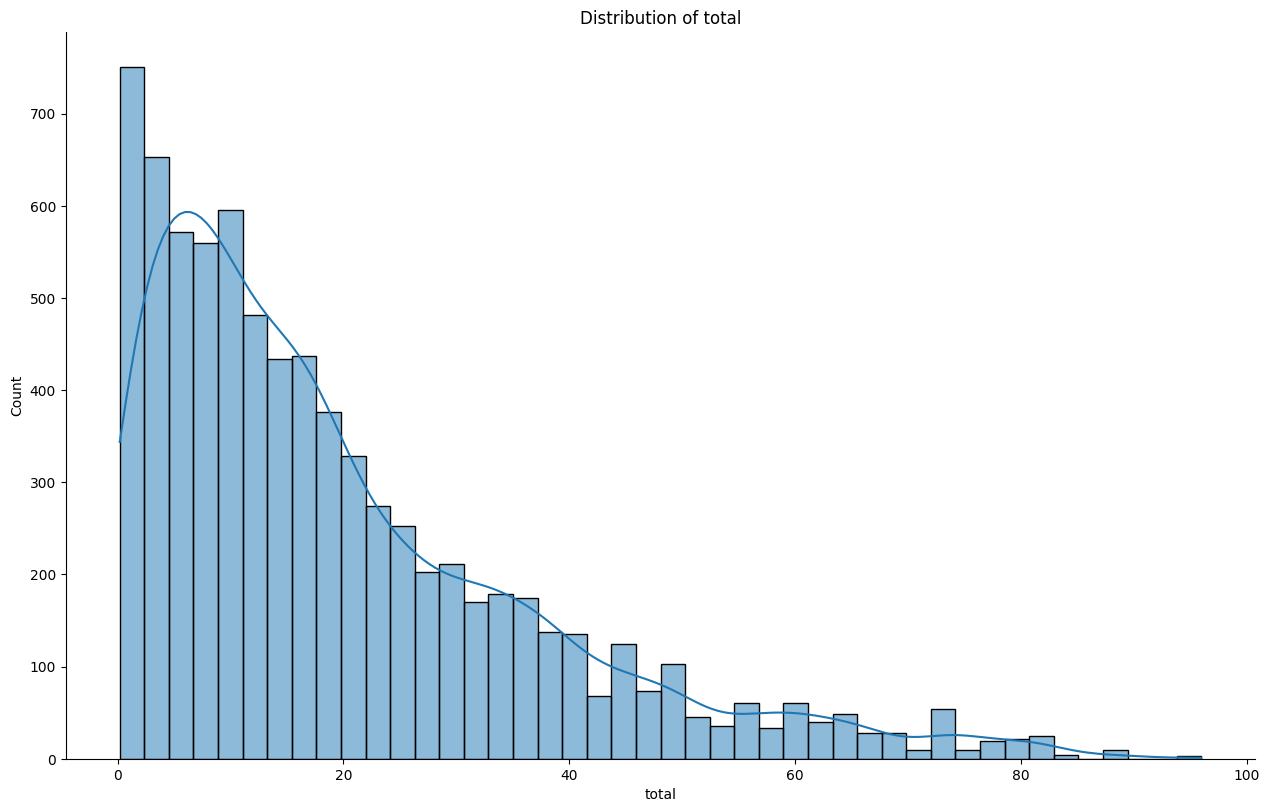

In [ ]:
plot_continuous_distribution(df, 'total')

- There are more transactions of low value and only occasionally make a transaction of a very high value.

In [ ]:
get_unique_values(df, 'product_id')

Column: product_id has 300 unique values

ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: product_id, Length: 300, dtype: int64


In [ ]:
get_unique_values(df, 'category')

Column: category has 22 unique values

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64


**fruit** and **vegetables** are the 2 most frequently purchased product categories and **spices and herbs** being the least.

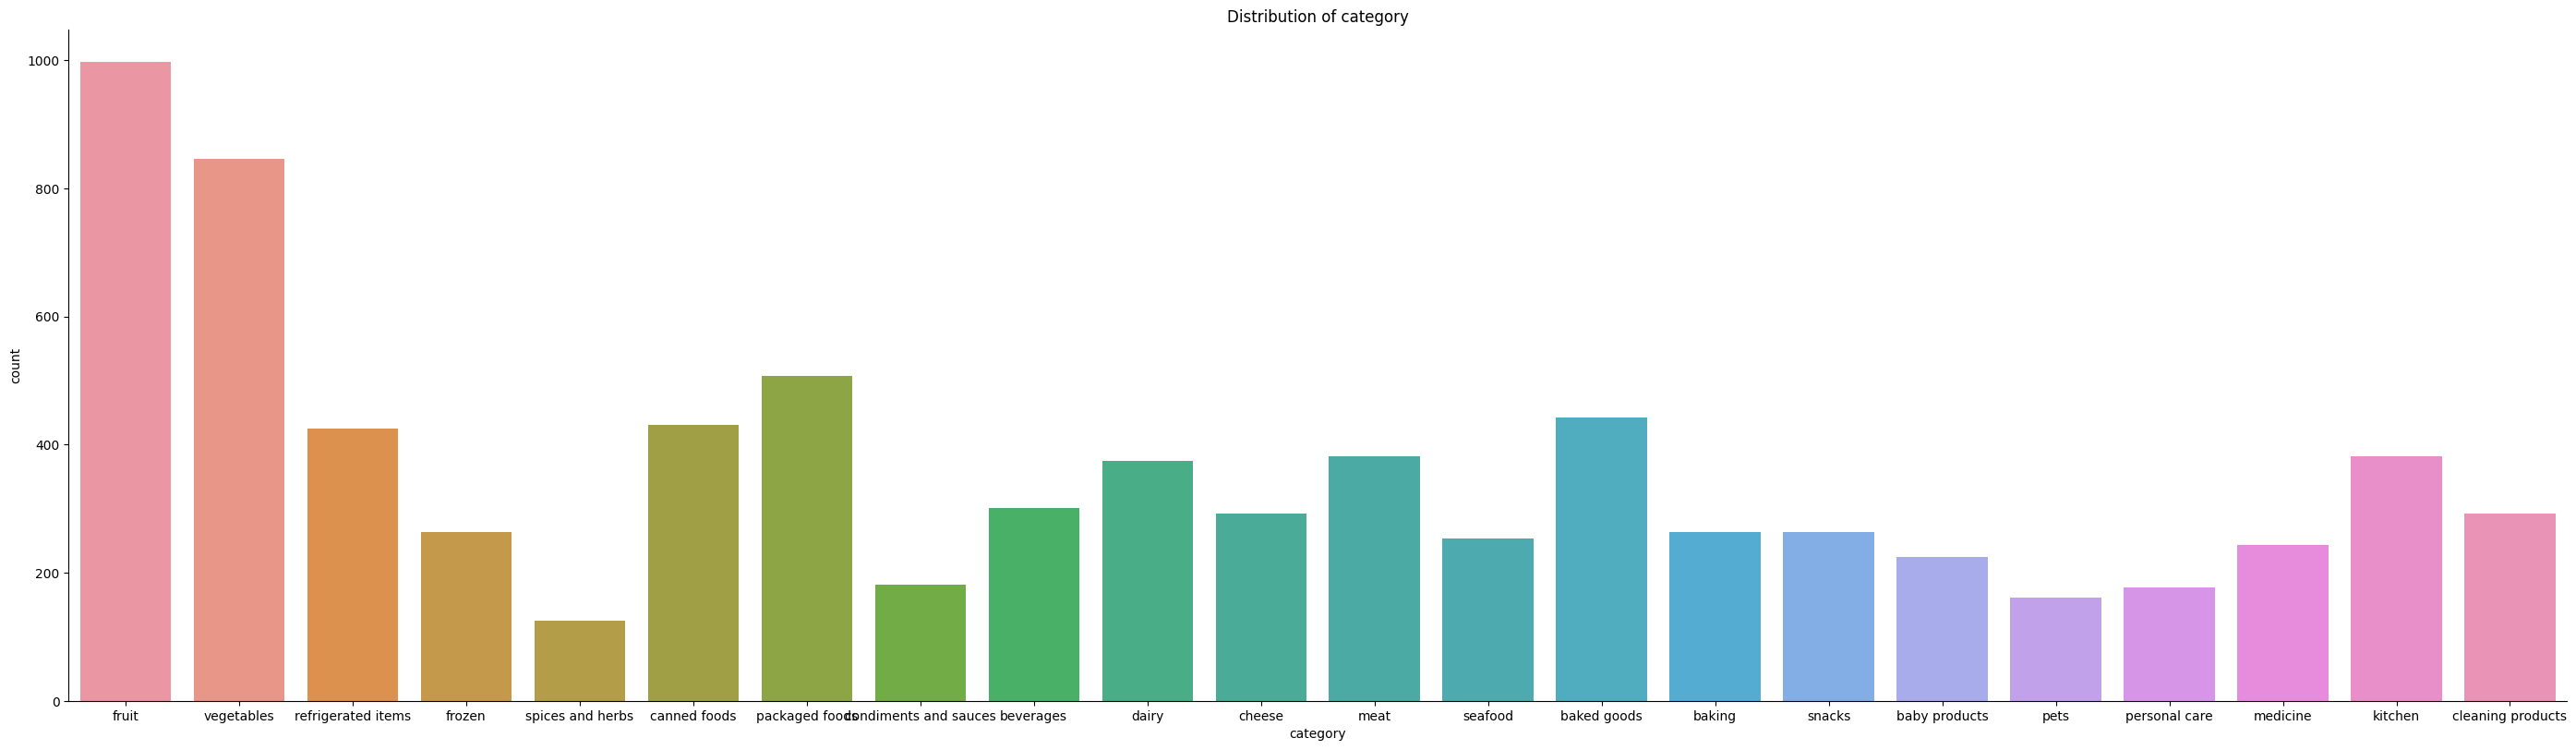

In [ ]:
plot_categorical_distribution(df, 'category', aspect=3.5)

In [ ]:
get_unique_values(df, 'customer_type')

Column: customer_type has 5 unique values

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


- Most of the customers are non-member
- Least of the customers are gold member
- All custumer types are evenly distributed

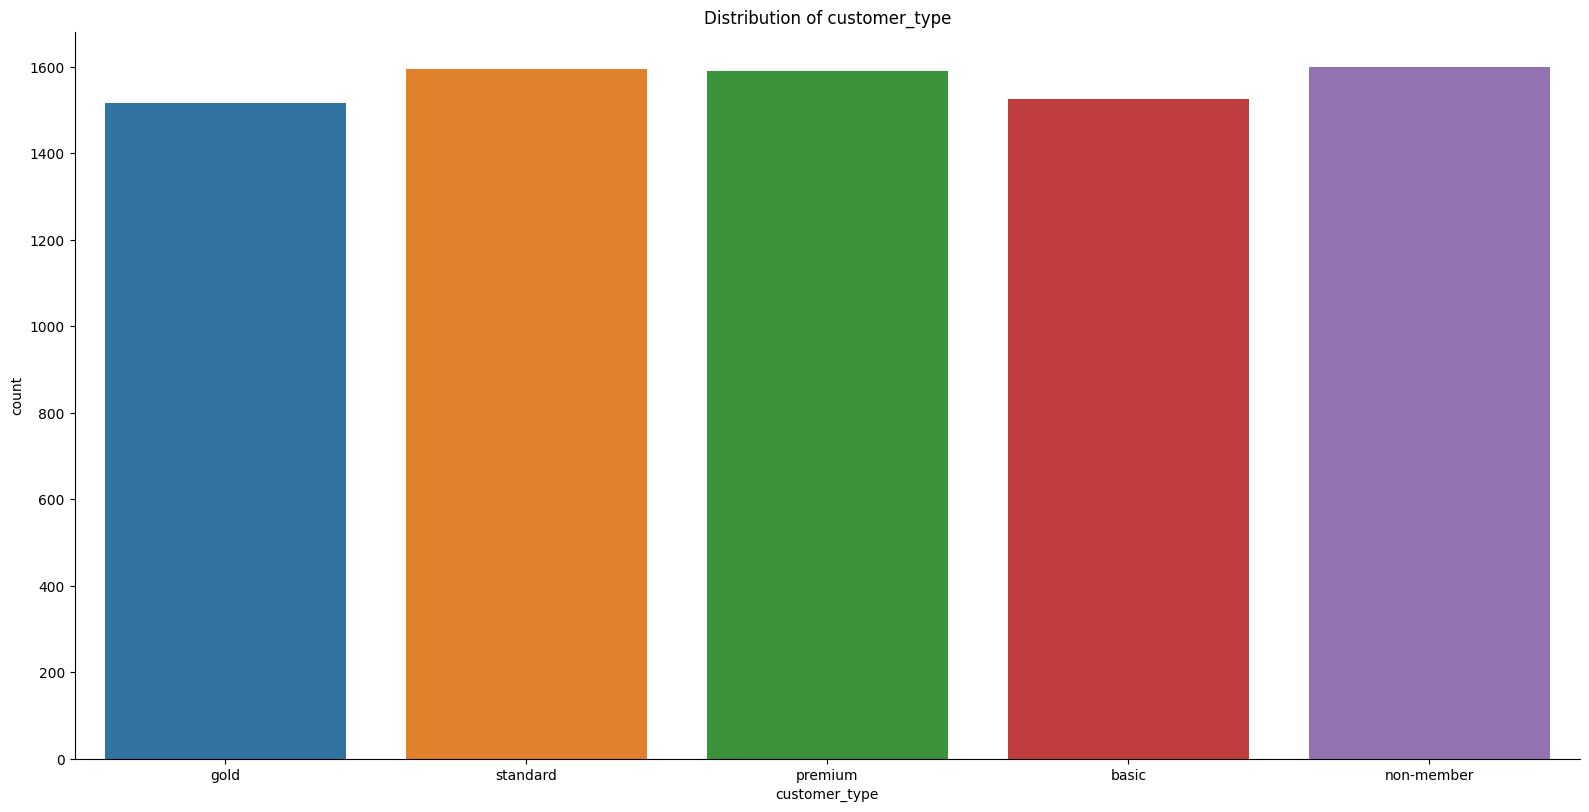

In [ ]:
plot_categorical_distribution(df, 'customer_type')

In [ ]:
get_unique_values(df, 'payment_type')

Column: payment_type has 4 unique values

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


- Most of the payment are done by cash
- Least of the payment are done by debit card
- All payment type are evenly distributed

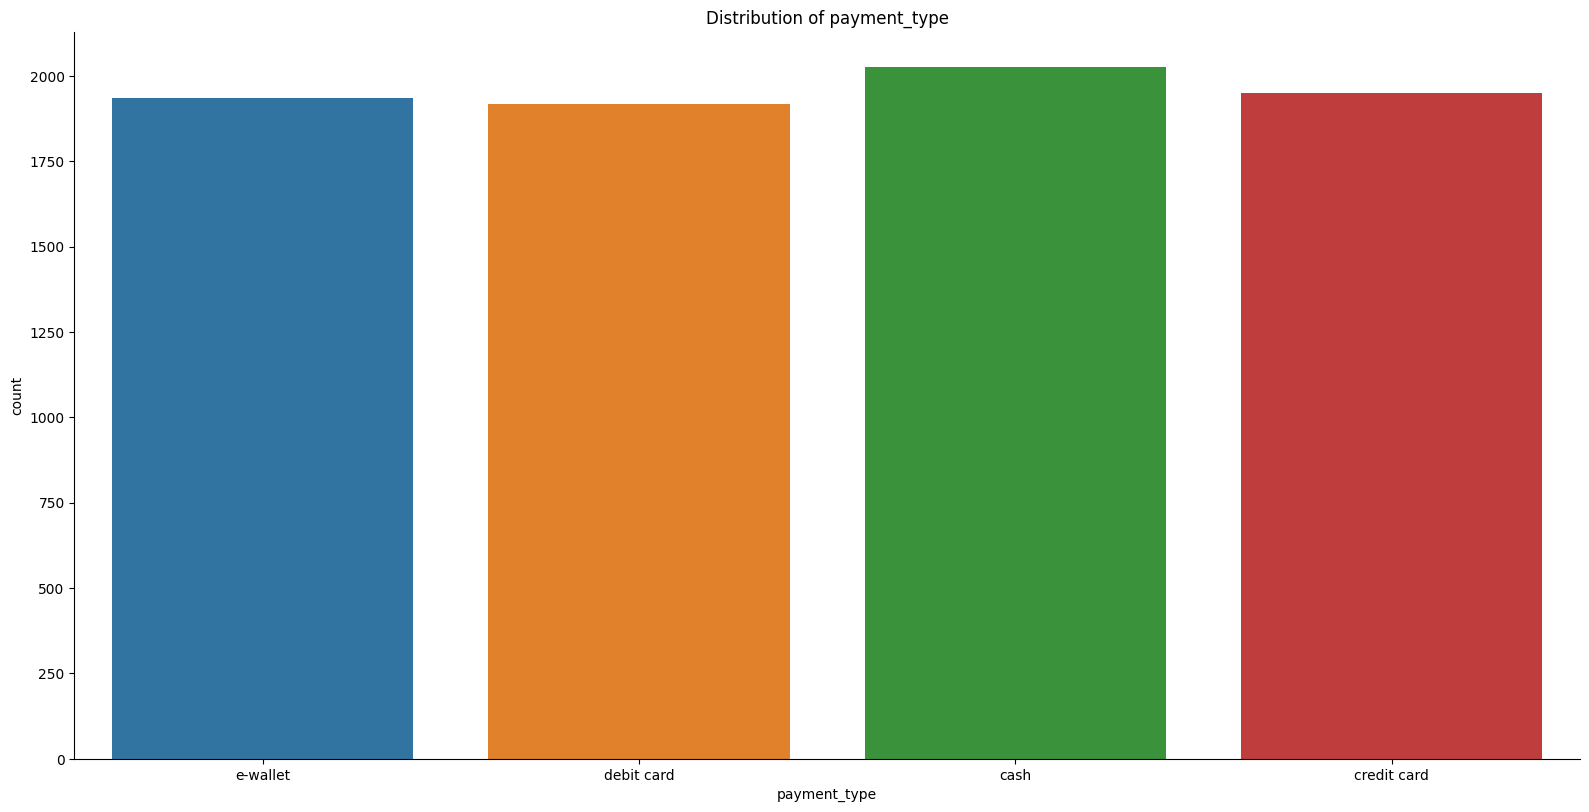

In [ ]:
plot_categorical_distribution(df, 'payment_type')

In [ ]:
#timestamp to data time format
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

In [ ]:
df = convert_to_datetime(df, 'timestamp')
#converting string to datetime format for opractions to be done

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [ ]:
df['hour'] = df['timestamp'].dt.hour
#Since it is in 24 hr format

In [ ]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14


In [ ]:
get_unique_values(df, 'hour')

Column: hour has 11 unique values

11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64


- most of the purchases has been done during 11th, 16th, 18th hr of the day(i.e 11am, 4pm, 6pm)

In [ ]:
cat_hr = pd.crosstab(df.category,df.hour)
cat_hr

hour,9,10,11,12,13,14,15,16,17,18,19
category,,,,,,,,,,,
baby products,19,20,21,20,17,16,24,24,24,25,14
baked goods,43,51,41,41,34,36,42,44,34,38,39
baking,29,24,16,19,17,22,24,19,29,35,30
beverages,22,25,33,29,24,23,27,29,32,30,27
canned foods,44,32,54,48,37,43,33,38,37,38,27
cheese,28,25,19,31,32,26,26,28,30,26,22
cleaning products,29,28,38,29,28,30,24,25,23,18,20
condiments and sauces,10,16,10,16,13,23,16,22,20,24,11
dairy,30,34,27,27,33,40,41,41,28,38,36


In [ ]:
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'No. of Product_Category Sold during hr')]

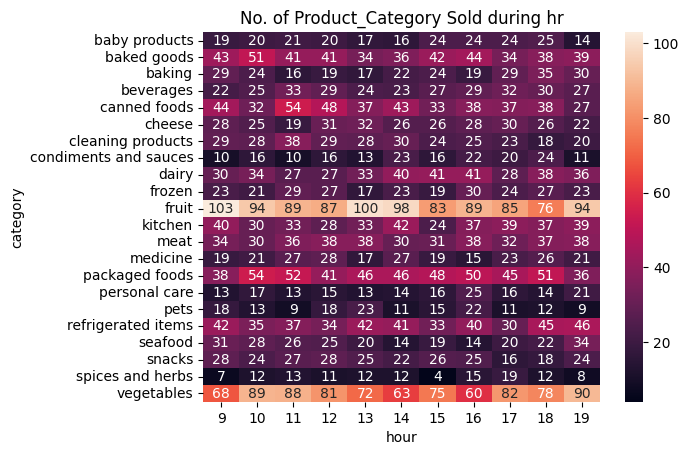

In [94]:
sns.heatmap(cat_hr, annot=True, fmt='d').set(title="No. of Product_Category Sold during hr")

In [88]:
cat_hr.rank(axis=0, ascending=False)

hour,9,10,11,12,13,14,15,16,17,18,19
category,,,,,,,,,,,
baby products,17.5,18.0,16.0,17.0,17.5,18.0,13.5,16.0,13.5,15.0,19.0
baked goods,4.0,4.0,5.0,4.5,7.0,8.0,4.0,4.0,6.0,6.0,4.5
baking,11.5,14.5,18.0,18.0,17.5,16.5,13.5,19.0,11.0,10.0,10.0
beverages,16.0,12.5,9.5,9.5,13.0,14.0,9.0,11.0,7.5,11.0,11.5
canned foods,3.0,7.0,3.0,3.0,6.0,4.0,6.5,7.5,5.0,6.0,11.5
cheese,13.5,12.5,17.0,8.0,10.0,12.0,10.5,12.0,9.5,13.5,15.0
cleaning products,11.5,10.5,6.0,9.5,11.0,9.5,13.5,14.0,15.5,18.5,18.0
condiments and sauces,21.0,20.0,21.0,20.0,20.5,14.0,19.5,17.5,17.5,16.0,20.0
dairy,10.0,6.0,13.0,14.5,8.5,7.0,5.0,5.0,12.0,6.0,7.5


[Text(0.5, 1.0, 'Ranking of Product_Category Sold during hr')]

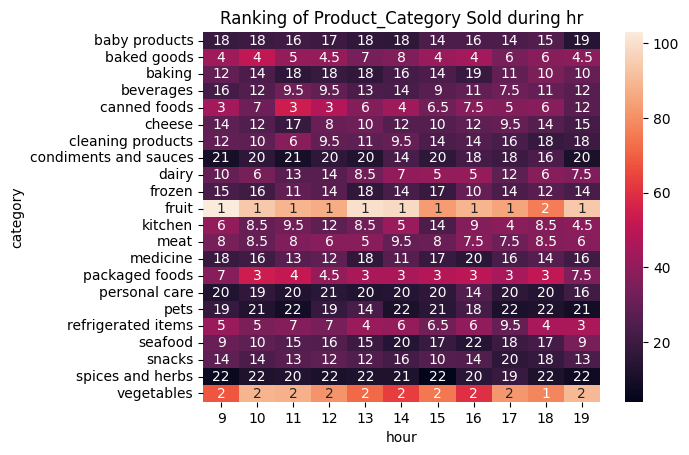

In [92]:
sns.heatmap(cat_hr, annot=cat_hr.rank(axis=0, ascending=False)).set(title="Ranking of Product_Category Sold during hr")